In [1]:
%matplotlib ipympl

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# from scipy.ndimage import gaussian_filter

from __future__ import print_function
from matplotlib import pyplot as plt
import matplotlib
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import matplotlib.colors as colors
import matplotlib.cm as cmx
from mpl_toolkits.axes_grid1 import make_axes_locatable
# from PIL import Image
from tqdm.notebook import trange, tqdm, tnrange
import time
from datetime import datetime

# import math
# import glob
import numpy as np


# import itertools
import os.path
import os
import sys
# from skimage.io import imread
import cv2

# import pandas as pd

# from scipy.signal import savgol_filter
# import pytesseract 
# from scipy.signal import find_peaks

matplotlib.rcParams.update({'font.size': 14})
plt.rcParams["font.family"] = "arial"


import importlib

import SimpleITK as sitk
# import imageio

In [8]:
## Import functions
PathToFunctions = '/Users/iracicot/Documents/GitHub/HySE_HypercubeFunctions/'
sys.path.append(PathToFunctions)
import HySE


## Indicate which wavelengths were used (Panel4, Panel2), in nm
Wavelengths_list = np.array([475,566,494,590,518,614,542,638, 482,578,506,602,530,626,554,650])


SavingPath = '/Users/iracicot/Library/CloudStorage/OneDrive-UniversityofCambridge/Data/CCRC/20240531/'
## Locate the data to analyse
Name = 'Flat_3x'
WhiteName = 'Flat_White_3x'

# CropImDimensions = [166,680, 42,520] ## Dazzle, PoM
CropImDimensions = [166+100,680-100, 42+100,520-100] ## Dazzle, PoM


DataPath = SavingPath
vidPath = DataPath+Name+'.mpg'
vidPathWhite = DataPath+WhiteName+'.mpg'

ATTENTION: ReturnPeaks is set to True. Be careful, the output will have three elements!
Add 'Help=True' in input for a list and description of all optional parameters 
Max plateau size set to 30
Min long dark size set to 50
Expected plateau size set to 17
Only importing the trace of the data
Cropping Image
Cropping image: x [266 : 580],y [142, 420]
Setting peak height to 0.03
Setting peak distance to 15

[18 21 18 18 18 21 18 18 18 21 18 21 18 21 18 18 18]
  separation: 75 - 17 plateaux, avg 18.88 frames +/- 1.37


[21 18 18 18 21 18 18 18 21 18 18 18 21 18 18 18 21]
  separation: 75 - 17 plateaux, avg 18.88 frames +/- 1.37


[18 21 15 21 18 18 18 21 18 18 18 21 18 18 18 21 18]
  separation: 75 - 17 plateaux, avg 18.71 frames +/- 1.64


[18 18 21 18 18 18 21 18 18 18 21 18 18 18 21 18 18]
  separation: 75 - 17 plateaux, avg 18.71 frames +/- 1.27


[18 21 18 18 18 21 18 18 18 21 18 18 18 21 18 18 18]
  separation: 54 - 17 plateaux, avg 18.71 frames +/- 1.27

Saving figure at this locati

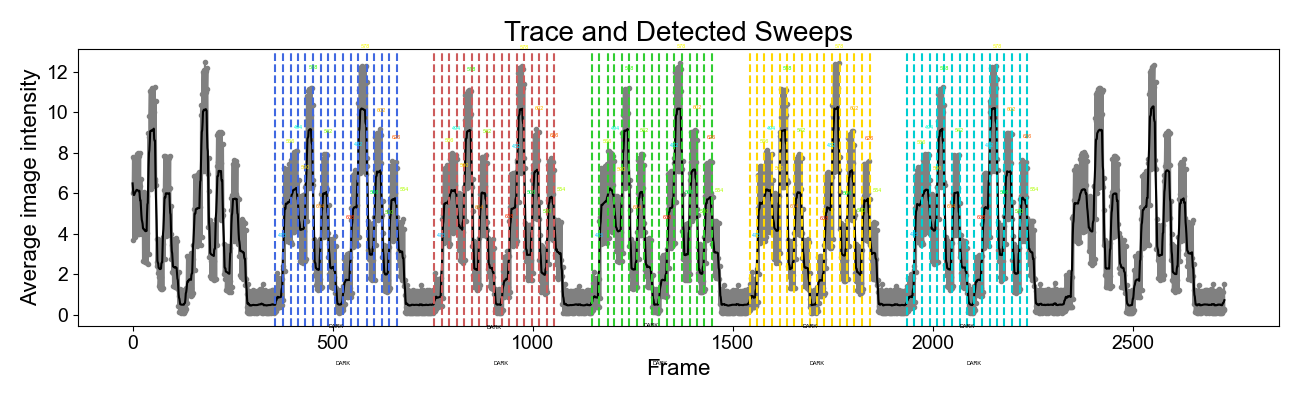

In [9]:
## DATA

EdgePos = HySE.FindHypercube(vidPath, Wavelengths_list, PlotGradient=False, CropImDimensions=CropImDimensions, DarkMin=50, PlateauSize=17, 
                             MaxPlateauSize=30, PeakHeight=0.03, ReturnPeaks=False, PeakDistance=15, WindowLength=6)

ATTENTION: ReturnPeaks is set to True. Be careful, the output will have three elements!
Add 'Help=True' in input for a list and description of all optional parameters 
Max plateau size set to 30
Min long dark size set to 50
Expected plateau size set to 17
Only importing the trace of the data
Cropping Image
Cropping image: x [266 : 580],y [142, 420]
Setting peak height to 0.035
Setting peak distance to 15

[18 18 18 21 18 18 18 21 18 18 18 21 18 18 18 21 18]
  separation: 75 - 17 plateaux, avg 18.71 frames +/- 1.27


[18 18 21 18 18 18 21 18 18 18 21 18 18 18 21 18 18]
  separation: 75 - 17 plateaux, avg 18.71 frames +/- 1.27


[18 21 18 18 18 21 18 18 21 18 18 18 18 21 18 18 18]
  separation: 75 - 17 plateaux, avg 18.71 frames +/- 1.27


[18 18 21 18 18 18 21 18 18 18 21 18 18 18 21 18 18]
  separation: 75 - 17 plateaux, avg 18.71 frames +/- 1.27

Saving figure at this location: 
   /Users/iracicot/Library/CloudStorage/OneDrive-UniversityofCambridge/Data/CCRC/20240531/20240918__10-22-3

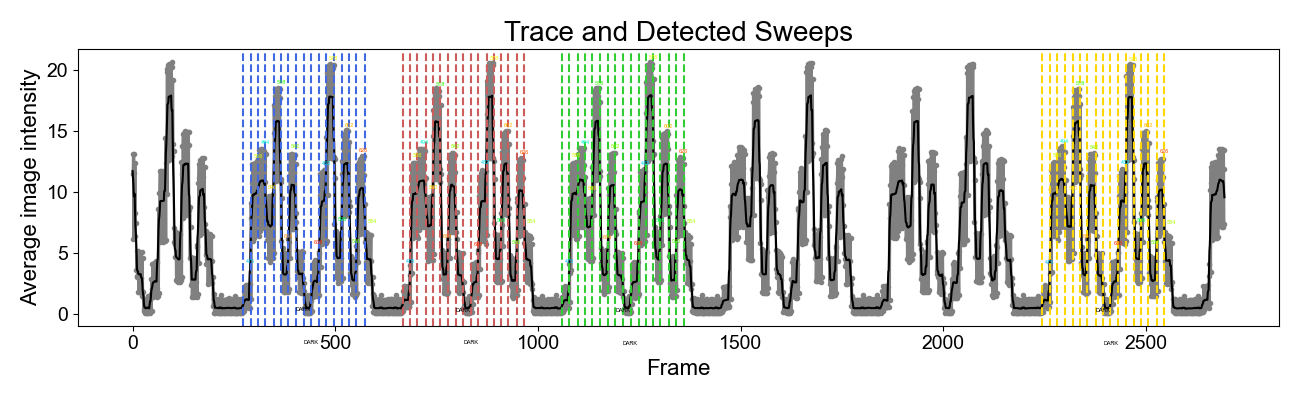

In [10]:
## WHITE

EdgePosWhite = HySE.FindHypercube(vidPathWhite, Wavelengths_list, PlotGradient=False, CropImDimensions=CropImDimensions, DarkMin=50, PlateauSize=17, 
                                  MaxPlateauSize=30, PeakHeight=0.035, ReturnPeaks=False, PeakDistance=15, WindowLength=6)

In [11]:
## Get the data for the selected sweep

Nsweep = 3
DataSweep = HySE.GetSweepData_FromPath(vidPath, EdgePos, Nsweep, CropImDimensions=CropImDimensions)

Cropping Image
Cropping image: x [266 : 580],y [142, 420]


Buffer of frames to ignore between neighbouring wavelenghts set to default 2x6
Cropping image: x [266 : 580],y [142, 420]
Cropping Image
Cropping image: x [266 : 580],y [142, 420]
Computing hypercube: Averaging 6 frames
Computing hypercube: Averaging 6 frames
Computing hypercube: Averaging 6 frames
Computing hypercube: Averaging 6 frames


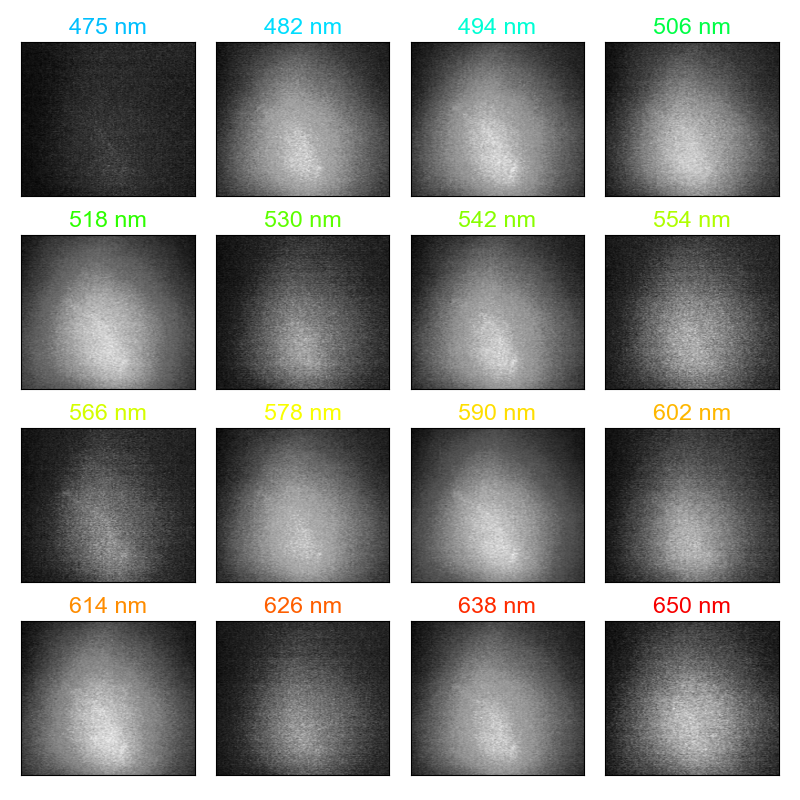

In [12]:
## Get the hypercube for the white reference

HypercubeWhite, _ = HySE.ComputeHypercube(vidPathWhite, EdgePosWhite, Wavelengths_list, BufferSize=12, CropImDimensions=CropImDimensions)

In [13]:
## Get Dark
Dark = HySE.GetDark(vidPath, EdgePos, CropImDimensions=CropImDimensions, Buffer=6, SaveDark=False)

Cropping Image
Cropping image: x [266 : 580],y [142, 420]
Buffer set to 6.
Assuming DarkRepeat = 3,
SaveDark set to False.
min = 0.00, max = 9.00, avg = 0.48, std = 0.88
min = 0.00, max = 9.00, avg = 0.48, std = 0.88
min = 0.00, max = 9.00, avg = 0.48, std = 0.88
min = 0.00, max = 9.00, avg = 0.48, std = 0.89
min = 0.00, max = 9.00, avg = 0.50, std = 0.90


In [ ]:
# def PlotCoRegistered(im_static, im_shifted, im_coregistered, **kwargs):
#     """

#     kwargs: 
#         - ShowPlot False(True)
#         - SavePlot False(True)
#         - SavingPathWithName (default '')

#     """
#     try:
#         SavingPathWithName = kwargs['SavingPathWithName']
#     except KeyError:
#         SavingPathWithName = ''

#     try:
#         SavePlot = kwargs['SavePlot']
#     except KeyError:
#         SavePlot = False

#     try:
#         ShowPlot = kwargs['ShowPlot']
#     except KeyError:
#         ShowPlot = False

#     images_diff_0 = np.subtract(im_shifted.astype('float64'), im_static.astype('float64'))
#     images_diff_0_avg = np.average(np.abs(images_diff_0))
# #     images_diff_0_std = np.std(np.abs(images_diff_0))
#     images_diff_cr = np.subtract(im_coregistered.astype('float64'), im_static.astype('float64'))
#     images_diff_cr_avg = np.average(np.abs(images_diff_cr))
# #     images_diff_cr_std = np.average(np.std(images_diff_cr))

#     mmm, MMM = 0, 255
#     mm0, MM0 = FindPlottingRange(images_diff_0)
#     mm, MM = FindPlottingRange(images_diff_cr)

#     norm = MidpointNormalize(vmin=mm0, vmax=MM0, midpoint=0)
#     cmap = 'RdBu_r'

#     fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,7))
#     im00 = ax[0,0].imshow(im_static, cmap='gray',vmin=mmm, vmax=MMM)
#     ax[0,0].set_title('Static Image')
#     divider = make_axes_locatable(ax[0,0])
#     cax = divider.append_axes('right', size='5%', pad=0.05)
#     cbar = fig.colorbar(im00, cax=cax, orientation='vertical')

#     im01 = ax[0,1].imshow(im_shifted, cmap='gray',vmin=mmm, vmax=MMM)
#     ax[0,1].set_title('Shifted Image')
#     divider = make_axes_locatable(ax[0,1])
#     cax = divider.append_axes('right', size='5%', pad=0.05)
#     cbar = fig.colorbar(im01, cax=cax, orientation='vertical')

#     im02 = ax[0,2].imshow(images_diff_0, cmap=cmap, norm=norm)
#     ax[0,2].set_title(f'Difference (no registration)\n avg {images_diff_0_avg:.2f}')
#     divider = make_axes_locatable(ax[0,2])
#     cax = divider.append_axes('right', size='5%', pad=0.05)
#     cbar = fig.colorbar(im02, cax=cax, orientation='vertical')

#     im10 = ax[1,0].imshow(im_static, cmap='gray',vmin=mmm, vmax=MMM)
#     ax[1,0].set_title('Static Image')
#     divider = make_axes_locatable(ax[1,0])
#     cax = divider.append_axes('right', size='5%', pad=0.05)
#     cbar = fig.colorbar(im10, cax=cax, orientation='vertical')

#     im11 = ax[1,1].imshow(im_coregistered, cmap='gray',vmin=mmm, vmax=MMM)
#     ax[1,1].set_title('Coregistered Image')
#     divider = make_axes_locatable(ax[1,1])
#     cax = divider.append_axes('right', size='5%', pad=0.05)
#     cbar = fig.colorbar(im11, cax=cax, orientation='vertical')

#     im12 = ax[1,2].imshow(images_diff_cr, cmap=cmap, norm=norm)
#     ax[1,2].set_title(f'Difference (with registration)\n avg {images_diff_cr_avg:.2f}')
#     divider = make_axes_locatable(ax[1,2])
#     cax = divider.append_axes('right', size='5%', pad=0.05)
#     cbar = fig.colorbar(im12, cax=cax, orientation='vertical')

#     ## Add grid to help see changes in images
#     (YY, XX) = im_static.shape
#     xm, ym = int(XX/2), int(YY/2)
#     xmm, ymm = int(xm/2), int(ym/2)
#     x_points = [xmm, xm, xm+xmm, 3*xmm]
#     y_points = [ymm, ym, ym+ymm, 3*ymm]
#     for i in range(0,3):
#         for j in range(0,2):
#             ax[j,i].set_xticks([])
#             ax[j,i].set_yticks([])
#             for k in range(0,4):
#                 ax[j,i].axvline(x_points[k], c='limegreen', ls='dotted')
#                 ax[j,i].axhline(y_points[k], c='limegreen', ls='dotted')

#     plt.tight_layout()
#     if SavePlot:
#         if '.png' not in SavingPathWithName:
#             SavingPathWithName = SavingPathWithName+'_CoRegistration.png'
#         print(f'Saving figure @ {SavingPathWithName}')
#         # print(f'   Set SavingPathWithName=\'path\' to set saving path')
#         plt.savefig(f'{SavingPathWithName}')
#     if ShowPlot:
#         plt.show()
#     else:
#         plt.close()

In [14]:
def NormaliseFrames(image, image_white, image_dark):
    ## Convert to float to avoid numerical errors
    im = image.astype('float64')
    white = image_white.astype('float64')
    dark = image_dark.astype('float64')
    # Subtract dark
    im_d = np.subtract(im, dark)
    white_d = np.subtract(white, dark)
    ## avoid negative
    im_d = im_d - np.amin(im_d)
    white_d = white_d - np.amin(white_d)
#     print(f'Normalisation: subtracted {np.amin(im_d):.2f}, {np.amin(white_d):.2f}')
    ## Divide image by white, avoiding /0 errors
    im_n = np.divide(im_d, white_d, out=np.zeros_like(im_d), where=white_d!=0)
#     print(f'Normalised frame: min: {np.amin(im_n):.1f}, max: {np.amax(im_n):.1f}')
#     im_n = im_n-np.amin(im_n)
#     im_n = im_n/np.amax(im_n)
#     im_n = im_n*np.amax(im)
#     print(f' NOW: Normalised frame: min: {np.amin(im_n):.1f}, max: {np.amax(im_n):.1f}')
    return im_n



def CoRegisterImages(im_static, im_shifted, **kwargs):
    ## If we don't expect complex deformations, set transform to affine
    ## To limit unwanted distortions
    try: 
        Affine = kwargs['Affine']
    except KeyError:
        Affine = False
        
        
    t0 = time.time()
    ## Convert the numpy array to simple elestix format
    im_static_se = sitk.GetImageFromArray(im_static)
    im_shifted_se = sitk.GetImageFromArray(im_shifted)

    ## Create object
    elastixImageFilter = sitk.ElastixImageFilter()

    ## Turn off console
    elastixImageFilter.LogToConsoleOff()

    ## Set image parameters
    elastixImageFilter.SetFixedImage(im_static_se)
    elastixImageFilter.SetMovingImage(im_shifted_se)

    ## Set transform parameters
    if Affine:
        parameterMap = sitk.GetDefaultParameterMap('affine')
    else:
        parameterMap = sitk.GetDefaultParameterMap('translation')
        ## Select metric robust to intensity differences (non uniform)
        parameterMap['Metric'] = ['AdvancedMattesMutualInformation'] 
        ## Select Bspline transform, which allows for non rigid and non uniform deformations
        parameterMap['Transform'] = ['BSplineTransform']

    ## Tried those parameters, on Macbeth chart data (not moving), did not have significant impact
#     parameterMap['AutomaticTransformInitialization'] = ['true']
#     parameterMap['AutomaticTransformInitializationMethod'] = ['CenterOfGravity']
#     parameterMap['HistogramMatch'] = ['true']
#     parameterMap['BSplineRegularizationOrder'] = ['11'] ## default 3
#     parameterMap['Optimizer'] = ['AdaptiveStochasticGradientDescent']


    ## Parameters to play with if co-registration is not optimal:

#         # Controls how long the optimizer runs
#     parameterMap['MaximumNumberOfIterations'] = ['500'] 
#         # You can try different metrics like AdvancedMattesMutualInformation, NormalizedCorrelation, 
#         # or AdvancedKappaStatistic for different registration scenarios.
#     parameterMap['Metric'] = ['AdvancedMattesMutualInformation']
#         # Adjust the number of bins used in mutual information metrics
#     parameterMap['NumberOfHistogramBins'] = ['32']
#         # Change the optimizer to AdaptiveStochasticGradientDescent for potentially better convergence
#     parameterMap['Optimizer'] = ['AdaptiveStochasticGradientDescent']
#         # Controls the grid spacing for the BSpline transform
#     parameterMap['FinalGridSpacingInPhysicalUnits'] = ['10.0']
#         # Refines the BSpline grid at different resolutions.
#     parameterMap['GridSpacingSchedule'] = ['10.0', '5.0', '2.0']
#         # Automatically estimate the scales for the transform parameters.
#     parameterMap['AutomaticScalesEstimation'] = ['true']
#         # Controls the number of resolutions used in the multi-resolution pyramid. 
#         # A higher number can lead to better registration at the cost of increased computation time.
#     parameterMap['NumberOfResolutions'] = ['4']
#         # Automatically initializes the transform based on the center of mass of the images.
#     parameterMap['AutomaticTransformInitialization'] = ['true']
#         # Controls the interpolation order for the final transformation.
#     parameterMap['FinalBSplineInterpolationOrder'] = ['3']

# #         # Adjust the maximum step length for the optimizer
# #     parameterMap['MaximumStepLength'] = ['4.0']
# #         # Use more samples for computing gradients
# #     parameterMap['NumberOfSamplesForExactGradient'] = ['10000']
# #         # Specify the grid spacing in voxels for the final resolution.
# #     parameterMap['FinalGridSpacingInVoxels'] = ['8.0']
# #         # Defines the spacing of the sampling grid used during optimization.
# #     parameterMap['SampleGridSpacing'] = ['2.0']


    ## If required, set maximum number of iterations
#     parameterMap['MaximumNumberOfIterations'] = ['500']
    elastixImageFilter.SetParameterMap(parameterMap)

    ## Execute
    result = elastixImageFilter.Execute()
    ## Convert result to numpy array
    im_coregistered = sitk.GetArrayFromImage(result)
    t1 = time.time()

    ## Find time taken:
    time_taken = t1-t0

    ## Get an idea of difference
    shift_val = np.average(np.abs(np.subtract(im_static,im_coregistered)))

    ## return 
    return im_coregistered, shift_val, time_taken


def PlotCoRegistered(im_static, im_shifted, im_coregistered, **kwargs):
    """

    kwargs: 
        - ShowPlot False(True)
        - SavePlot False(True)
        - SavingPathWithName (default '')

    """
    try:
        SavingPathWithName = kwargs['SavingPathWithName']
    except KeyError:
        SavingPathWithName = ''

    try:
        SavePlot = kwargs['SavePlot']
    except KeyError:
        SavePlot = False

    try:
        ShowPlot = kwargs['ShowPlot']
    except KeyError:
        ShowPlot = False

    images_diff_0 = np.subtract(im_shifted.astype('float64'), im_static.astype('float64'))
    images_diff_0_avg = np.average(np.abs(images_diff_0))
#     images_diff_0_std = np.std(np.abs(images_diff_0))
    images_diff_cr = np.subtract(im_coregistered.astype('float64'), im_static.astype('float64'))
    images_diff_cr_avg = np.average(np.abs(images_diff_cr))
#     images_diff_cr_std = np.average(np.std(images_diff_cr))

#     mmm, MMM = 0, 255
    mmm = min(np.amin(im_static), np.amin(im_shifted), np.amin(im_coregistered))
    MMM = max(np.amax(im_static), np.amax(im_shifted), np.amax(im_coregistered))
    mm0, MM0 = FindPlottingRange(images_diff_0)
    mm, MM = FindPlottingRange(images_diff_cr)

    norm = MidpointNormalize(vmin=mm0, vmax=MM0, midpoint=0)
    cmap = 'RdBu_r'

    m, M = FindPlottingRange(im_static)
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,7))
    im00 = ax[0,0].imshow(im_static, cmap='gray',vmin=m, vmax=M)
    ax[0,0].set_title('Static Image')
    divider = make_axes_locatable(ax[0,0])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im00, cax=cax, orientation='vertical')

    m, M = FindPlottingRange(im_shifted)
    im01 = ax[0,1].imshow(im_shifted, cmap='gray',vmin=m, vmax=M)
    ax[0,1].set_title('Shifted Image')
    divider = make_axes_locatable(ax[0,1])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im01, cax=cax, orientation='vertical')

    im02 = ax[0,2].imshow(images_diff_0, cmap=cmap, norm=norm)
    ax[0,2].set_title(f'Difference (no registration)\n avg {images_diff_0_avg:.2f}')
    divider = make_axes_locatable(ax[0,2])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im02, cax=cax, orientation='vertical')

    m, M = FindPlottingRange(im_static)
    im10 = ax[1,0].imshow(im_static, cmap='gray',vmin=m, vmax=M)
    ax[1,0].set_title('Static Image')
    divider = make_axes_locatable(ax[1,0])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im10, cax=cax, orientation='vertical')

    m, M = FindPlottingRange(im_coregistered)
    im11 = ax[1,1].imshow(im_coregistered, cmap='gray',vmin=m, vmax=M)
    ax[1,1].set_title('Coregistered Image')
    divider = make_axes_locatable(ax[1,1])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im11, cax=cax, orientation='vertical')

    im12 = ax[1,2].imshow(images_diff_cr, cmap=cmap, norm=norm)
    ax[1,2].set_title(f'Difference (with registration)\n avg {images_diff_cr_avg:.2f}')
    divider = make_axes_locatable(ax[1,2])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im12, cax=cax, orientation='vertical')

    ## Add grid to help see changes in images
    (YY, XX) = im_static.shape
    xm, ym = int(XX/2), int(YY/2)
    xmm, ymm = int(xm/2), int(ym/2)
    x_points = [xmm, xm, xm+xmm, 3*xmm]
    y_points = [ymm, ym, ym+ymm, 3*ymm]
    for i in range(0,3):
        for j in range(0,2):
            ax[j,i].set_xticks([])
            ax[j,i].set_yticks([])
            for k in range(0,4):
                ax[j,i].axvline(x_points[k], c='limegreen', ls='dotted')
                ax[j,i].axhline(y_points[k], c='limegreen', ls='dotted')

    plt.tight_layout()
    if SavePlot:
        if '.png' not in SavingPathWithName:
            SavingPathWithName = SavingPathWithName+'_CoRegistration.png'
        print(f'Saving figure @ {SavingPathWithName}')
        # print(f'   Set SavingPathWithName=\'path\' to set saving path')
        plt.savefig(f'{SavingPathWithName}')
    if ShowPlot:
        plt.show()
    else:
        plt.close()



def SweepCoRegister_WithNormalisation(DataSweep, WhiteHypercube, Dark, Wavelengths_list, **kwargs):
    """
    Apply Simple Elastix co-registration to all sweep

    Input:
        - DataSweep: List of 3D arrays. Each element in the list contains all frames in a plateau (wavelength)
        - WhiteHypercube: 
        - kwargs 
            - Buffer: sets the numner of frames to ignore on either side of a colour transition
                Totale number of frames removed = 2*Buffer (default 6)
            - ImStatic_Plateau: sets the plateau (wavelength) from which the static image is selected (default 1)
            - ImStatic_Index: sets which frame in the selected plateau (wavelength) as the static image (default 8)
            - PlotDiff: Whether to plot figure showing the co-registration (default False)
                If set to True, also expects:
                - SavingPath: Where to save figure (default '')
                - Plot_PlateauList: for which plateau(x) to plot figure. Aceepts a list of integers or "All" for all plateau (defaul 5)
                - Plot_Index: which frame (index) to plot for each selected plateau (default 14)
            - SaveHypercube: whether or not to save the hypercybe and the sorted wavelengths as npz format
                (default True)


    Outputs:
        - Normalised and co-registered Hypercube

    """
    AllIndices = [DataSweep[i].shape[0] for i in range(0,len(DataSweep))]
    MaxIndex = np.amax(AllIndices)
    MinIndex = np.amin(AllIndices)
    # print(AllIndices)
    # print(MaxIndex)

    try:
        Buffer = kwargs['Buffer']
    except KeyError:
        Buffer = 6

    try:
        ImStatic_Plateau = kwargs['ImStatic_Plateau']
        if ImStatic_Plateau==8:
            print(f'Careful! You have set ImStatic_Plateau to 8, which is typically a dark. If this is the case, the co-registration will fail')
    except KeyError:
        ImStatic_Plateau = 1

    try:
        ImStatic_Index = kwargs['ImStatic_Index']
        if ImStatic_Index<5 or ImStatic_Index<Buffer:
            print(f'Careful! You have set ImStatic_Index < 5 or < Buffer ')
            print(f'	This is risks being in the range of unreliable frames too close to a colour transition.')
        if ImStatic_Index>(MinIndex-Buffer):
            print(f'Careful! You have set ImStatic_Index  > (MinIndex - Buffer')
            print(f'	This is risks being in the range of unreliable frames too close to a colour transition.')
    except KeyError:
        ImStatic_Index = 8
        if MinIndex>ImStatic_Index:
            ImStatic_Index = int(MinIndex/2)
            print(f'ImStatic_Index is outside default range. Set to {ImStatic_Index}, please set manually with ImStatic_Index')

    try: 
        PlotDiff = kwargs['PlotDiff']
    except KeyError:
        PlotDiff = False

    if PlotDiff:
        print(f'PlotDiff set to True. Use \'Plot_PlateauList=[]\' or \'All\' and Plot_Index=int to set')

    try: 
        SavingPath = kwargs['SavingPath']
    except KeyError:
        SavingPath = ''
        print(f'PlotDiff has been set to True. Indicate a SavingPath.')

    try: 
        Plot_PlateauList = kwargs['Plot_PlateauList']
        if isinstance(Plot_PlateauList, int):
            Plot_PlateauList = [Plot_PlateauList]
    except:
        Plot_PlateauList = [5]


    try: 
        Plot_Index = kwargs['Plot_Index']
        if Plot_Index<Buffer or Plot_Index>(MinIndex-Buffer):
            print(f'PlotIndex is outside the range of indices that will be analyse ({Buffer}, {MinIndex-Buffer})')
            Plot_Index = int(MinIndex/2)
            print(f'	Seeting it to {PlotIndex}')
    except:
        Plot_Index = 14
        print(f'MinIndex = {MinIndex}, MinIndex-Buffer = {MinIndex-Buffer}')
        if Plot_Index>(MinIndex-Buffer):
            Plot_Index = int(MinIndex/2)
            print(f'Plot_Index outside default range. Set to {Plot_Index}, please set manually with Plot_Index')

    try:
        SaveHypercube = kwargs['SaveHypercube']
        print(f'SaveHypercube set to {SaveHypercube}')
    except:
        SaveHypercube = True

    print(f'Static image: plateau {ImStatic_Plateau}, index {ImStatic_Index}. Use ImStatic_Plateau and ImStatic_Index to change it.')
    print(f'Buffer set to {Buffer}')


    t0 = time.time()
    Ncolours = len(DataSweep)
    (_, YY, XX) = DataSweep[1].shape

    ## Deal with special cases when plateau list is input as string
    if isinstance(Plot_PlateauList, str):
        if Plot_PlateauList=='All':
            Plot_PlateauList = [i for i in range(0,Ncolours)]
        elif Plot_PlateauList=='None':
            Plot_PlateauList = []


    ## Sort Wavelengths
    order_list = np.argsort(Wavelengths_list)
    Wavelengths_sorted = Wavelengths_list[order_list]

    Hypercube = []

    ## Define static image
    im_static = DataSweep[ImStatic_Plateau][ImStatic_Index,:,:]
    ImStatic_Plateau_sorted = order_list[ImStatic_Plateau]
    im_staticN = NormaliseFrames(im_static, WhiteHypercube[ImStatic_Plateau_sorted,:,:], Dark)

    ## Loop through all colours (wavelengths)
    print(f'\n Plot_PlateauList = {Plot_PlateauList}, Plot_Index = {Plot_Index}\n')

    for c in range(0, Ncolours):
        if c==8: ## ignore dark
            # print(f'DARK')
            pass
        else:
            ImagesTemp = []
            (NN, YY, XX) = DataSweep[c].shape
            for i in range(Buffer,NN-Buffer):
                im_shifted = DataSweep[c][i,:,:]
                if c>=8: ## the hypercube does not include dark in the middle
                    hypercube_index = order_list[c-1] ## hypercube is already sorted
                    im_white = WhiteHypercube[hypercube_index,:,:]
                else:
                    hypercube_index = order_list[c]
                    im_white = WhiteHypercube[hypercube_index,:,:]

                im_shiftedN = NormaliseFrames(im_shifted, im_white, Dark)

#                 fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13,4))
#                 im0 = ax[0].imshow(im_shifted)
#                 ax[0].set_title(f'im_shifted: Min: {np.amin(im_shifted):.2f}\n Avg: {np.average(im_shifted):.2f}\n Max: {np.amax(im_shifted):.2f}')
#                 divider = make_axes_locatable(ax[0])
#                 cax = divider.append_axes("right", size="5%", pad=0.05)
#                 plt.colorbar(im0, cax=cax)

#                 im1 = ax[1].imshow(im_white)
#                 ax[1].set_title(f'im_white: Min: {np.amin(im_white):.2f}\n Avg: {np.average(im_white):.2f}\n Max: {np.amax(im_white):.2f}')
#                 divider = make_axes_locatable(ax[1])
#                 cax = divider.append_axes("right", size="5%", pad=0.05)
#                 plt.colorbar(im1, cax=cax)

#                 im2 = ax[2].imshow(im_shiftedN, vmin=0, vmax=np.average(im_shiftedN)*3)
#                 ax[2].set_title(f'im_shiftedN: Min: {np.amin(im_shiftedN):.2f}\n Avg: {np.average(im_shiftedN):.2f}\n Max: {np.amax(im_shiftedN):.2f}')
#                 divider = make_axes_locatable(ax[2])
#                 cax = divider.append_axes("right", size="5%", pad=0.05)
#                 plt.colorbar(im2, cax=cax)

#                 plt.tight_layout()
#                 plt.savefig(f'{SavingPath}_TEST_{i}.png')
# #                 print(f'Saving test figure at {SavingPath}_TEST_{i}.png')
#                 plt.close()


                im_coregistered, shift_val, time_taken = CoRegisterImages(im_staticN, im_shiftedN)

#                 im_coregistered = im_shiftedN


                ImagesTemp.append(im_coregistered)

                ## Plot co-registration is requested
                if PlotDiff:
                    # print(f'c={c}, i={i}')
                    if c in Plot_PlateauList:
                        if '.png' in SavingPath:
                            NameTot = SavingPath.split('/')[-1]
                            Name = NameTot.replace('.png', '')+f'_Plateau{c}_Index{i}.png'
                            SavingPathWithName = SavingPath.replace(NameTot, Name)
                        else:
                            Name = f'Plateau{c}_Plateau{c}_Index{i}_CoRegistration.png'
                            SavingPathWithName = SavingPath+Name

                        if i==Plot_Index:
                            if c==ImStatic_Plateau and i==ImStatic_Index:
                                print(f'Skipping plot for plateau={c}, index={i} because it is the static image')
                            else:
                                PlotCoRegistered(im_static, im_shifted, im_coregistered, SavePlot=True, SavingPathWithName=SavingPathWithName)


            ImagesTemp = np.array(ImagesTemp)
            ImAvg = np.average(ImagesTemp, axis=0)
            Hypercube.append(ImAvg)

    tf = time.time()
    Hypercube = np.array(Hypercube)
    ## Calculate time taken
    time_total = tf-t0
    minutes = int(time_total/60)
    seconds = time_total - minutes*60
    print(f'\n\n Co-registration took {minutes} min and {seconds:.0f} s in total\n')

    ## Sort hypercube according to the order_list
    ## Ensures wavelenghts are ordered from blue to red
    Hypercube_sorted = []
    for k in range(0,Hypercube.shape[0]):
        Hypercube_sorted.append(Hypercube[order_list[k]])
    Hypercube_sorted = np.array(Hypercube_sorted)


    if SaveHypercube:
        if '.png' in SavingPath:
            NameTot = SavingPath.split('/')[-1]
            Name = NameTot.replace('.png', '')+f'_CoregisteredHypercube.npz'
            Name_wav = NameTot.replace('.png', '')+f'_CoregisteredHypercube_wavelengths.npz'
            SavingPathHypercube = SavingPath.replace(NameTot, Name)
            SavingPathWavelengths = SavingPath.replace(NameTot, Name_wav)
        else:
            Name = f'_CoregisteredHypercube.npz'
            Name_wav = f'_CoregisteredHypercube_wavelengths.npz'
            SavingPathHypercube = SavingPath+Name
            SavingPathWavelengths = SavingPath+Name_wav

        np.savez(f'{SavingPathHypercube}', Hypercube)
        np.savez(f'{SavingPathWavelengths}', Wavelengths_sorted)

    return Hypercube_sorted

In [ ]:
# ## Now attempt co-registration and normalisation

# SP = f'{SavingPath}{Name}'

# HypercubeN = SweepCoRegister_WithNormalisation(DataSweep, HypercubeWhite, Dark, Wavelengths_list, Buffer=6, Plot_Index=3, Plot_Plateau=15, 
#                                                     ImStatic_Plateau=11, ImStatic_Index=8, SaveHypercube=False, SavingPath=SP)

In [ ]:
HySE.PlotHypercube(HypercubeN, Wavelengths=Wavelengths_list, SavePlot=False, SavingPathWithName=SP)

In [ ]:
order_list = np.argsort(Wavelengths_list)
print(order_list)
Wavelengths_sorted = Wavelengths_list[order_list]
print(Wavelengths_sorted)

ind = np.where(order_list==1)

print(ind[0][0])

In [15]:
def NormaliseImage(array):
    im0 = array-np.amin(array)
    im1 = im0/np.amax(im0)
    return im1

def FindPlottingRange(array):
    array_flat = array.flatten()
    array_sorted = np.sort(array_flat)    
    mean = np.average(array_sorted)
    std = np.std(array_sorted)
    MM = mean+3*std
    mm = mean-3*std
#     print(f'FindPlottingRange: min={np.amin(array_flat):.1f}, avg={mean:.1f}, max={np.amax(array_flat):.1f}, mm={mm}, MM={MM}')
    return mm, MM

class MidpointNormalize(matplotlib.colors.Normalize):
    def __init__(self, vmin, vmax, midpoint=0, clip=False):
        self.midpoint = midpoint
        matplotlib.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        normalized_min = max(0, 1 / 2 * (1 - abs((self.midpoint - self.vmin) / (self.midpoint - self.vmax))))
        normalized_max = min(1, 1 / 2 * (1 + abs((self.vmax - self.midpoint) / (self.midpoint - self.vmin))))
        normalized_mid = 0.5
        x, y = [self.vmin, self.midpoint, self.vmax], [normalized_min, normalized_mid, normalized_max]
        return np.ma.masked_array(np.interp(value, x, y))

def find_closest(arr, val):
    idx = np.abs(arr - val).argmin()
    return idx


def SweepRollingCoRegister_WithNormalisation(DataSweep, WhiteHypercube, Dark, Wavelengths_list, **kwargs):
    info="""
    Apply Simple Elastix co-registration to all sweep

    Input:
        - DataSweep: List of 3D arrays. Each element in the list contains all frames in a plateau (wavelength)
        - WhiteHypercube: White reference hypercube (3D array, assumed sorted)
        - Dark: 2D array
        - kwargs 
            - Buffer: sets the numner of frames to ignore on either side of a colour transition
                Totale number of frames removed = 2*Buffer (default 6)
            - ImStatic_Wavelength: sets the wavelength (in nm) from which the static image is selected (default closest to 550)
            - ImStatic_Index: sets which frame in the selected plateau (wavelength) as the static image (default 8)
            - PlotDiff: Whether to plot figure showing the co-registration (default False)
                If set to True, also expects:
                - SavingPath: Where to save figure (default '')
                - Plot_PlateauList: for which plateau(x) to plot figure. Aceepts a list of integers or "All" for all plateau (defaul 5)
                - Plot_Index: which frame (index) to plot for each selected plateau (default 14)
            - SaveHypercube: whether or not to save the hypercybe and the sorted wavelengths as npz format
                (default True)
            - Help: print this help message is True


    Outputs:
        - Normalised and co-registered Hypercube

    """
    
    try:
        Help = kwargs['Help']
    except KeyError:
        Help = False
    if Help:
        print(info)
        return 0
        
    AllIndices = [DataSweep[i].shape[0] for i in range(0,len(DataSweep))]
    MaxIndex = np.amax(AllIndices)
    MinIndex = np.amin(AllIndices)
    # print(AllIndices)
    # print(MaxIndex)

    ## Sort Wavelengths
    order_list = np.argsort(Wavelengths_list)
    Wavelengths_sorted = Wavelengths_list[order_list]

    try:
        Buffer = kwargs['Buffer']
    except KeyError:
        Buffer = 6

    try:
        ImStatic_Index = kwargs['ImStatic_Index']
        if ImStatic_Index<5 or ImStatic_Index<Buffer:
            print(f'Careful! You have set ImStatic_Index < 5 or < Buffer ')
            print(f'	This index risks being in the range of unreliable frames too close to a colour transition.')
        if ImStatic_Index>(MinIndex-Buffer):
            print(f'Careful! You have set ImStatic_Index  > (MinIndex - Buffer')
            print(f'	This index risks being in the range of unreliable frames too close to a colour transition.')
    except KeyError:
        ImStatic_Index = 8
        if MinIndex>ImStatic_Index:
            ImStatic_Index = int(MinIndex/2)
            print(f'ImStatic_Index is outside default range. Set to {ImStatic_Index}, please set manually with ImStatic_Index')

    try:
        ImStatic_Wavelength = kwargs['ImStatic_Wavelength']
        StaticWav_index = find_closest(Wavelengths_list, ImStatic_Wavelength)
        StaticWav_index_sorted = find_closest(Wavelengths_sorted, ImStatic_Wavelength)
        ImStatic_Wavelength = Wavelengths_list[StaticWav_index]
        print(f'ImStatic_Wavelength set to {ImStatic_Wavelength} nm')
    except KeyError:
        ImStatic_Wavelength = 550
        StaticWav_index = find_closest(Wavelengths_list, ImStatic_Wavelength)
        StaticWav_index_sorted = find_closest(Wavelengths_sorted, ImStatic_Wavelength)
        ImStatic_Wavelength = Wavelengths_list[StaticWav_index]
        print(f'ImStatic_Wavelength set by default closest to 550, to {ImStatic_Wavelength} nm')


    print(f'Static image: {ImStatic_Wavelength} nm (index/plateau {StaticWav_index}), index {ImStatic_Index}. Use ImStatic_Wavelength and ImStatic_Index to change it.')
    print(f'   NB: ImStatic_Index refers to the frame number in a given plateau/wavelenght used as initial static image. Not to be confused with array index,')


    try:
        ImStatic_Plateau = kwargs['ImStatic_Plateau']
        print(f'Please input ImStatic_Wavelength instead (in nm)')
    except KeyError:
        pass


    try: 
        PlotDiff = kwargs['PlotDiff']
    except KeyError:
        PlotDiff = False

    if PlotDiff:
        print(f'PlotDiff set to True. Use \'Plot_PlateauList=[]\' or \'All\' and Plot_Index=int to set')

    try: 
        SavingPath = kwargs['SavingPath']
    except KeyError:
        SavingPath = ''
        print(f'PlotDiff has been set to True. Indicate a SavingPath.')

    try: 
        Plot_PlateauList = kwargs['Plot_PlateauList']
        if isinstance(Plot_PlateauList, int):
            Plot_PlateauList = [Plot_PlateauList]
    except:
        print(f'Set Plot_PlateauList and Plot_Index to set images to plot')
        Plot_PlateauList = [5]


    try: 
        Plot_Index = kwargs['Plot_Index']
        if Plot_Index<Buffer or Plot_Index>(MinIndex-Buffer):
            print(f'PlotIndex is outside the range of indices that will be analysed ({Buffer}, {MinIndex-Buffer})')
            Plot_Index = int(MinIndex/2)
            print(f'	Seeting it to {PlotIndex}')
    except:
        Plot_Index = 14
        print(f'MinIndex = {MinIndex}, MinIndex-Buffer = {MinIndex-Buffer}')
        if Plot_Index>(MinIndex-Buffer):
            Plot_Index = int(MinIndex/2)
            print(f'Plot_Index outside default range. Set to {Plot_Index}, please set manually with Plot_Index')

    try:
        SaveHypercube = kwargs['SaveHypercube']
        print(f'SaveHypercube set to {SaveHypercube}')
    except:
        SaveHypercube = True


    print(f'Buffer set to {Buffer}')


    t0 = time.time()
    Ncolours = len(DataSweep)-1
    (_, YY, XX) = DataSweep[1].shape

    ## Deal with special cases when plateau list is input as string
    if isinstance(Plot_PlateauList, str):
        if Plot_PlateauList=='All':
            Plot_PlateauList = [i for i in range(0,Ncolours)]
        elif Plot_PlateauList=='None':
            Plot_PlateauList = []


    ## Define static image
    if StaticWav_index>=8:
        ## to account for the fact that the dark is not included in the wavelengths list
        im_static_0 = DataSweep[StaticWav_index-1][ImStatic_Index,:,:]
    else:
        im_static_0 = DataSweep[StaticWav_index][ImStatic_Index,:,:]

    White_static_0 = WhiteHypercube[StaticWav_index_sorted,:,:]
    im_staticN_init = NormaliseFrames(im_static_0, White_static_0, Dark) ## HySE_ManipulateHypercube.
    im_staticN_0 = im_staticN_init

    ## Loop through all colours (wavelengths)
    print(f'\n Plot_PlateauList = {Plot_PlateauList}, Plot_Index = {Plot_Index}\n')

#         ImStatic_Wavelength = kwargs['ImStatic_Wavelength']
#         StaticWav_index = find_closest(Wavelengths_list, ImStatic_Wavelength)
#         StaticWav_index_sorted = find_closest(Wavelengths_sorted, ImStatic_Wavelength)
#         ImStatic_Wavelength = Wavelengths_list[wav_index]


    Hypercube = np.zeros(WhiteHypercube.shape)

    ## Starting from static image to higher wavelengths
    for u in range(StaticWav_index_sorted, Ncolours):
        wav = Wavelengths_sorted[u]
        print(f'  Wavelength = {wav} nm, u = {u} (going up)')
        ## Set static image for this wavelength
#         im_static = im_static_0
        im_staticN = im_staticN_0
        ## Find wavelnegth index in raw data frame
        c = np.where(Wavelengths_list==wav)[0][0]
        if c>=8:
            c=c+1
        ## Find white reference for wavelenght
        im_white = WhiteHypercube[u,:,:]
        ## Now co-register all frames
        ImagesTemp = []
        (NN, YY, XX) = DataSweep[c].shape
#         print(f'Index range: {Buffer}, {NN-Buffer}')
        for i in range(Buffer,NN-Buffer):
            im_shifted = DataSweep[c][i,:,:]
            ## Normalise before co-registration
            im_shiftedN = NormaliseFrames(im_shifted, im_white, Dark) #HySE_ManipulateHypercube.
            im_coregistered, shift_val, time_taken = CoRegisterImages(im_staticN, im_shiftedN)
            
            if i in [7]:
#                 print(f'Printing figure')
                fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(13,4))
                im0 = ax[0].imshow(im_shifted, cmap='gray')
                ax[0].set_title(f'Original image {wav}nm, i={i}, c={c}')
                divider = make_axes_locatable(ax[0])
                cax = divider.append_axes("right", size="5%", pad=0.05)
                plt.colorbar(im0, cax=cax)
                im1 = ax[1].imshow(im_white, cmap='gray')
                ax[1].set_title(f'White image')
                divider = make_axes_locatable(ax[1])
                cax = divider.append_axes("right", size="5%", pad=0.05)
                plt.colorbar(im1, cax=cax)
                mm, MM = FindPlottingRange(im_shiftedN)
                im2 = ax[2].imshow(im_shiftedN, cmap='gray', vmin=mm, vmax=MM)
                ax[2].set_title(f'Normalised image')
                divider = make_axes_locatable(ax[2])
                cax = divider.append_axes("right", size="5%", pad=0.05)
                plt.colorbar(im2, cax=cax)
                mmm, MMM = FindPlottingRange(im_coregistered)
                im3 = ax[3].imshow(im_coregistered, cmap='gray', vmin=mmm, vmax=MMM)
                ax[3].set_title(f'Coregistered image')
                divider = make_axes_locatable(ax[3])
                cax = divider.append_axes("right", size="5%", pad=0.05)
                plt.colorbar(im3, cax=cax)
                plt.tight_layout()
                plt.savefig(f'{SavingPath}TEST_{wav}nm_{i}.png')
                plt.close()
                
                
            ImagesTemp.append(im_coregistered)
            ## Set static image for next wavelength
            if i==ImStatic_Index:
#                 im_static_0 = im_static
                im_staticN_0 = im_coregistered

            ## Plot co-registration if requested
            if PlotDiff:
                if c in Plot_PlateauList:
                    if '.png' in SavingPath:
                        NameTot = SavingPath.split('/')[-1]
                        Name = NameTot.replace('.png', '')+f'_Plateau{c}_Index{i}.png'
                        SavingPathWithName = SavingPath.replace(NameTot, Name)
                    else:
                        Name = f'{wav}nm_Index{i}_CoRegistration.png'
                        SavingPathWithName = SavingPath+Name

                    if i==Plot_Index:
                        PlotCoRegistered(NormaliseImage(im_staticN), NormaliseImage(im_shiftedN), NormaliseImage(im_coregistered), SavePlot=True, SavingPathWithName=SavingPathWithName)

        ImagesTemp = np.array(ImagesTemp)
        ImAvg = np.average(ImagesTemp, axis=0)
        Hypercube[u,:,:] = ImAvg


    im_staticN_0 = im_staticN_init

    ## Starting now going from static wavelenght to lower wavelengths
    for uu in range(0, StaticWav_index_sorted):
        u = StaticWav_index_sorted-uu-1 ## go backwards

        wav = Wavelengths_sorted[u]
        print(f'  Wavelength = {wav} nm, u = {u} (going down)')
        ## Set static image for this wavelength
#         im_static = im_static_0
        im_staticN = im_staticN_0
        ## Find wavelnegth index in raw data frame
        c = np.where(Wavelengths_list==wav)[0][0]
        if c>=8:
            c=c+1
        
        ## Find white reference for wavelenght
        im_white = WhiteHypercube[u,:,:]
        ## Now co-register all frames
        ImagesTemp = []
        (NN, YY, XX) = DataSweep[c].shape
        
        for i in range(Buffer,NN-Buffer):
            im_shifted = DataSweep[c][i,:,:]
            ## Normalise before co-registration
            im_shiftedN = NormaliseFrames(im_shifted, im_white, Dark)
            im_coregistered, shift_val, time_taken = CoRegisterImages(im_staticN, im_shiftedN)
            
            if i in [7]:
#                 print(f'Printing figure')
                fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(13,4))
                im0 = ax[0].imshow(im_shifted, cmap='gray')
                ax[0].set_title(f'Original image {wav}nm, i={i}, c={c}')
                divider = make_axes_locatable(ax[0])
                cax = divider.append_axes("right", size="5%", pad=0.05)
                plt.colorbar(im0, cax=cax)
                im1 = ax[1].imshow(im_white, cmap='gray')
                ax[1].set_title(f'White image')
                divider = make_axes_locatable(ax[1])
                cax = divider.append_axes("right", size="5%", pad=0.05)
                plt.colorbar(im1, cax=cax)
                mm, MM = FindPlottingRange(im_shiftedN)
                im2 = ax[2].imshow(im_shiftedN, cmap='gray', vmin=mm, vmax=MM)
                ax[2].set_title(f'Normalised image')
                divider = make_axes_locatable(ax[2])
                cax = divider.append_axes("right", size="5%", pad=0.05)
                plt.colorbar(im2, cax=cax)
                mm, MM = FindPlottingRange(im_coregistered)
                im3 = ax[3].imshow(im_coregistered, cmap='gray', vmin=mm, vmax=MM)
                ax[3].set_title(f'Coregistered image')
                divider = make_axes_locatable(ax[3])
                cax = divider.append_axes("right", size="5%", pad=0.05)
                plt.colorbar(im3, cax=cax)
                plt.tight_layout()
                plt.savefig(f'{SavingPath}TEST_{wav}nm_{i}.png')
                plt.close()
            
            ImagesTemp.append(im_coregistered)
            ## Set static image for next wavelength
            if i==ImStatic_Index:
#                 im_static_0 = im_static
                im_staticN_0 = im_coregistered

            ## Plot co-registration if requested
            if PlotDiff:
                if c in Plot_PlateauList:
                    if '.png' in SavingPath:
                        NameTot = SavingPath.split('/')[-1]
                        Name = NameTot.replace('.png', '')+f'_Plateau{c}_Index{i}.png'
                        SavingPathWithName = SavingPath.replace(NameTot, Name)
                    else:
                        Name = f'{wav}nm_Index{i}_CoRegistration.png'
                        SavingPathWithName = SavingPath+Name

                    if i==Plot_Index:
                        PlotCoRegistered(im_staticN, im_shiftedN, im_coregistered, SavePlot=True, SavingPathWithName=SavingPathWithName)

        ImagesTemp = np.array(ImagesTemp)
        ImAvg = np.average(ImagesTemp, axis=0)
        Hypercube[u,:,:] = ImAvg



    tf = time.time()
    ## Calculate time taken
    time_total = tf-t0
    minutes = int(time_total/60)
    seconds = time_total - minutes*60
    print(f'\n\n Co-registration took {minutes} min and {seconds:.0f} s in total\n')

    ## Sort hypercube according to the order_list
    ## Ensures wavelenghts are ordered from blue to red
#     Hypercube_sorted = []
#     for k in range(0,Hypercube.shape[0]):
#         Hypercube_sorted.append(Hypercube[order_list[k]])
#     Hypercube_sorted = np.array(Hypercube_sorted)


    if SaveHypercube:
        if '.png' in SavingPath:
            NameTot = SavingPath.split('/')[-1]
            Name = NameTot.replace('.png', '')+f'_CoregisteredHypercube.npz'
            Name_wav = NameTot.replace('.png', '')+f'_CoregisteredHypercube_wavelengths.npz'
            SavingPathHypercube = SavingPath.replace(NameTot, Name)
            SavingPathWavelengths = SavingPath.replace(NameTot, Name_wav)
        else:
            Name = f'_CoregisteredHypercube.npz'
            Name_wav = f'_CoregisteredHypercube_wavelengths.npz'
            SavingPathHypercube = SavingPath+Name
            SavingPathWavelengths = SavingPath+Name_wav

        np.savez(f'{SavingPathHypercube}', Hypercube)
        np.savez(f'{SavingPathWavelengths}', Wavelengths_sorted)

    return Hypercube

In [16]:
SP = f'{SavingPath}{Name}'
HypercubeN = SweepRollingCoRegister_WithNormalisation(DataSweep, HypercubeWhite, Dark, Wavelengths_list, Buffer=6, Plot_Index=8, Plot_PlateauList='All', 
                                                      ImStatic_Index=8, SaveHypercube=False, SavingPath=SP, PlotDiff=True)

ImStatic_Wavelength set by default closest to 550, to 554 nm
Static image: 554 nm (index/plateau 14), index 8. Use ImStatic_Wavelength and ImStatic_Index to change it.
   NB: ImStatic_Index refers to the frame number in a given plateau/wavelenght used as initial static image. Not to be confused with array index,
PlotDiff set to True. Use 'Plot_PlateauList=[]' or 'All' and Plot_Index=int to set
SaveHypercube set to False
Buffer set to 6

 Plot_PlateauList = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], Plot_Index = 8

  Wavelength = 554 nm, u = 7 (going up)
Saving figure @ /Users/iracicot/Library/CloudStorage/OneDrive-UniversityofCambridge/Data/CCRC/20240531/Flat_3x554nm_Index8_CoRegistration.png
  Wavelength = 566 nm, u = 8 (going up)
Saving figure @ /Users/iracicot/Library/CloudStorage/OneDrive-UniversityofCambridge/Data/CCRC/20240531/Flat_3x566nm_Index8_CoRegistration.png
  Wavelength = 578 nm, u = 9 (going up)
Saving figure @ /Users/iracicot/Library/CloudStorage/OneDrive-U

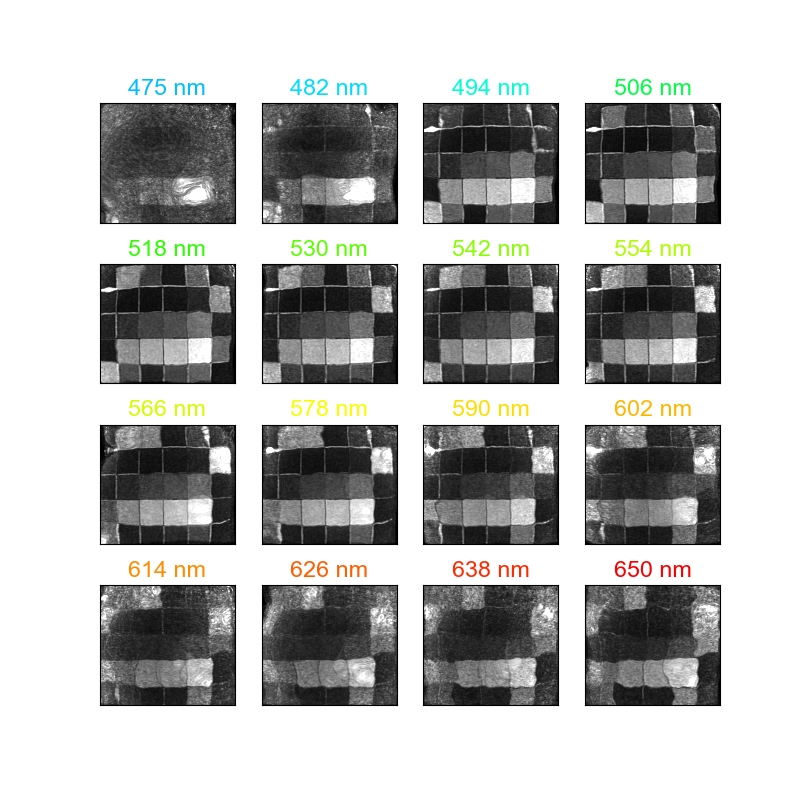

In [18]:
HySE.PlotHypercube(HypercubeN, Wavelengths=Wavelengths_list, SavePlot=False, SavingPathWithName=SP)

In [17]:
print(HypercubeN.shape)

(16, 278, 314)
